In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from paraatm.io.iff import read_iff_file
data = read_iff_file('IFF_SFO_ASDEX_ABC123.csv')

data['delta_tas'] = data['tas'].diff()
data['dt'] = (data['time']-data['time'].shift()).fillna(pd.to_timedelta(0.01,'s')).dt.total_seconds()
data['acc']= data['delta_tas']/data['dt']

In [3]:
data.head()

,recType,time,fltKey,bcnCode,cid,Source,msgType,callsign,recTypeCat,latitude,...,kybrdSymbol,adsCode,opsType,airportCode,trackNumber,tptReturnType,modeSCode,delta_tas,dt,acc
0,3,2019-01-01 00:25:15,27483,6366,NaN,0/MODE_S,0xE02,ABC123,1,37.61867,...,NaN,NaN,NaN,KAY,724,NaN,ad64cd,NaN,0.01,NaN
1,3,2019-01-01 00:25:16,27483,6366,NaN,0/MODE_S,0xE02,ABC123,1,37.61870,...,NaN,NaN,NaN,KAY,724,NaN,ad64cd,6.0,1.00,6.0
2,3,2019-01-01 00:25:18,27483,6366,NaN,0/MODE_S,0xE02,ABC123,1,37.61874,...,NaN,NaN,NaN,KAY,724,NaN,ad64cd,0.0,2.00,0.0
3,3,2019-01-01 00:25:19,27483,6366,NaN,0/MODE_S,0xE02,ABC123,1,37.61876,...,NaN,NaN,NaN,KAY,724,NaN,ad64cd,0.0,1.00,0.0
4,3,2019-01-01 00:25:20,27483,6366,NaN,0/MODE_S,0xE02,ABC123,1,37.61878,...,NaN,NaN,NaN,KAY,724,NaN,ad64cd,-2.0,1.00,-2.0


In [4]:
from SafetyBound import BoundAircraft

lhs = []
lps = []
rs = []
for i in range(len(data)-1):

    dt = pd.Timedelta(data.time[i+1]-data.time[i]).total_seconds()
    tas = data.tas[i+1]
    acc = (tas-data.tas[i])/dt
    hdg = data.heading[i+1]
    posAccur = data.coord1Accur[i+1]
    vwind0 = 0.1
    alphaw0 = 0.1

    b = BoundAircraft(tas,acc,dt,posAccur,hdg,vwind0,alphaw0)
    b.size()
    lh = b.lh
    lp = b.lp
    r = b.r

    lhs.append(lh)
    lps.append(lp)
    rs.append(r)

/home/edecarlo/para-atm-collection/safety-risk-uq/safety-bound-paraatm/SafetyBound.py:39: RuntimeWarning: divide by zero encountered in true_divide
  self.lh = abs(self.valong) * (self.tt + self.ett) + (self.valong) ** 2 / 2 / (self.a + self.ea)
/home/edecarlo/para-atm-collection/safety-risk-uq/safety-bound-paraatm/SafetyBound.py:40: RuntimeWarning: divide by zero encountered in true_divide
  self.lp = abs(self.vper) * (self.tt + self.ett) + (self.vper) ** 2 / 2 / (self.a + self.ea) + self.epGPS


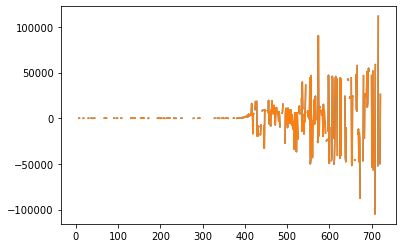

In [9]:
plt.plot(rs)

In [6]:
data.tas

0        0
1        6
2        6
3        6
4        4
      ... 
718    324
719    323
720    323
721    322
722    324
Name: tas, Length: 723, dtype: int64

In [5]:
dt

1.0